# Early Diagnosis of Diabetes

### Objective

The objective of this analysis is to review a database from the National Institute of Diabetes and Rental Diagnosis and check if the patient has diabetes based on the following measurements:

**Pregnancies:**  Number of times pregnent.

**Glucose:** 2-hour plasma glucose concentration in an oral glucose tolerance test.

**Blood Pressure:** Diastolic blood pressure (mm Hg).

**Skin Thickness:** Triceps skinfold thickness(mm).

**Insulin:** 2-hour serum insulin (mu U/ml).

**BMI:** Body mass Index (weight in kg(height in m)^2).

**DiabetesPedigreeFunction:** Diabetes pedigree function.

**Age:** Age(Years).

**Outcome:** Class variable(0 or 1, where 1 indicates the prsence of diabetes and 0 the absence).
       

### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

### Load Data

In [2]:
path='diabetes.csv'
data = pd.read_csv(path)

data_info= data.info()
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Outcome: Class variabl ( 1 = presence of diabetes and 0 = absence)

There are no null values in the data set and the data types appear appropriate for each column.

### AED

To understand the distribution of variables and the relationships between them.

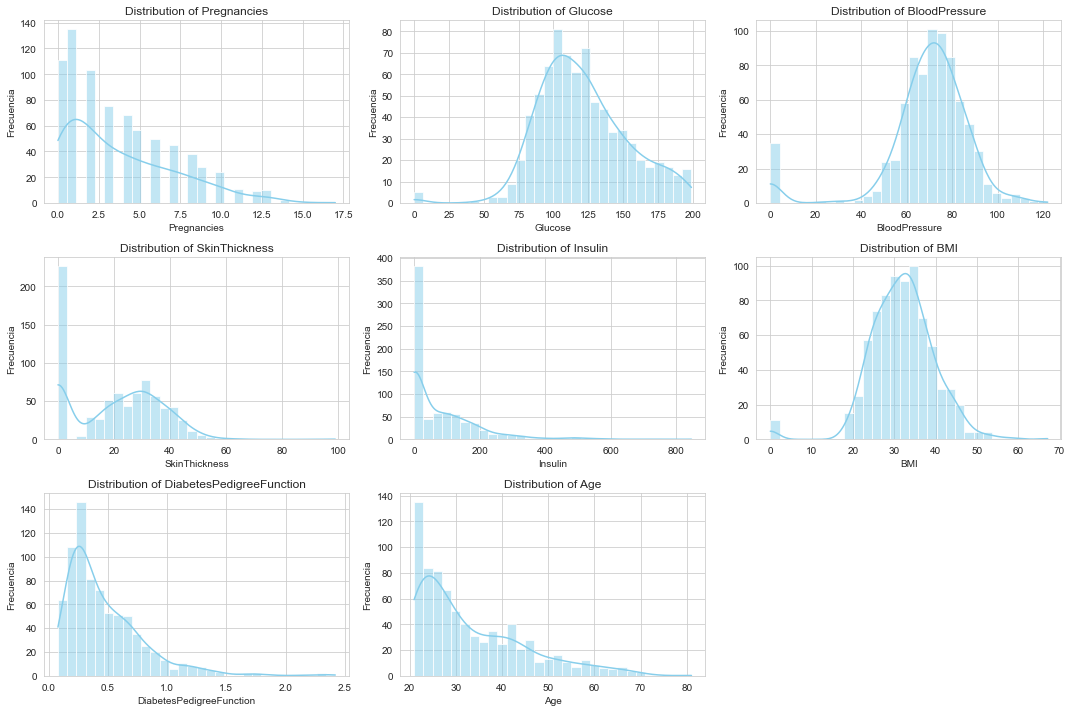

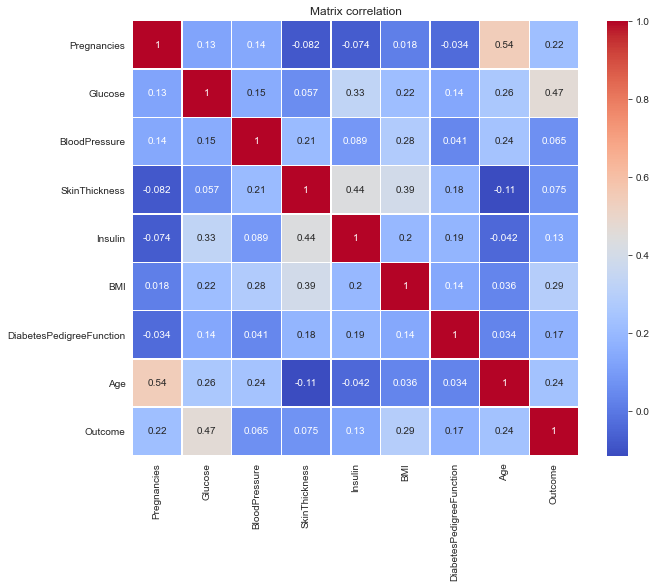

In [3]:
#configuration for visualization
sns.set_style("whitegrid")

#visualization of the distribution of the variables
plt.figure(figsize=(15,10))
for i, column in enumerate(data.columns[:-1],1):
    plt.subplot(3,3,i)
    sns.histplot(data[column], bins=30, kde=True, color="skyblue")
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    
plt.tight_layout()
plt.show()

#visualization of the correlation between variables
plt.figure(figsize=(10,8))
correlation_matrix =data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',linewidths=.5)
plt.title("Matrix correlation")
plt.show()

### 1. Distribution of variables:

* The variable pregnencis shows a right-skewed distribution, indicating that the majority of women in data set have a low to moderate number of pregnancies.

* The glucose variable appears to have a small number of values set to 0, which may not be realistic and may requir further review.

* The variables BloodPressure, SkinThickness and Insulin also have values of 0. We must decide if these values are realistic or if they represent missing data.

* The 'Age' variable is skewed to the right, indicating that the majority of women in the data set are relatively young.

### 2. Correlation between Variables:

* The correlation matrix shows how the variables are related to ach other. A value close to 1 or -1 indicates a strong positive or negative correlation, respectively.

* It can be seen that the variables 'Glucose', 'BMI' and 'Age' have a moderate correlation with 'Outcome', indicating that they could be important factors in predicting diabetes.

Given this analysis, the next steps include:

* Decide how to handle values of 0 for GLucose, BloodPressure, SkinThickness and Insulin.

* Standardize or normalize the characteristics, since they hav different ranges and units.

* Split the data set into training and test sets.

* Train a classification model.

### Data Preprocessing

1. Standardization of features: This includes normalizing features, splitting the data set into training and testing, and possibly handling correlated or irrelevant features.

First, we will set the values to 0 for the variables Glucose, BloodPressure, SkinThickness, and Insulin, replacing them with the median of each column.

In [4]:
#Defining columns that have valus of 0 that must be treated 
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']

#Replacing 0 values with NaN
for column in columns_with_zeros:
    data[column] = data[column].replace(0, np.nan)
    
#Replacing the NaN with the median of each column
for column in columns_with_zeros:
    data[column].fillna(data[column].median(), inplace =True)
    
    
#checking if NaN values still exist in the data set
nan_values = data.isnull().sum()

nan_values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

2. Standardization of features: Fetures will be standardize to have mean 0 and standard deviation 1. This is important for many machine learning algorithms.

3. Division of the Data set: We will divide the data set into training and testing in order to evaluate the model's ability to generalize on unseen data.

4. Classification Model Training: we will use a classification algorithm ( e.g. Logistic Regression) to train the model.

5. Model Evaluation: Once trained, we will evaluate its performance on the test set.
    
    

In [5]:
#Defination of the characteristics and the target variable
x= data.drop("Outcome", axis=1)
y= data["Outcome"]

#Splitting the data set into training and testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

#standardization of features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled.shape, x_test_scaled.shape

((614, 8), (154, 8))

I have divided the data set into training and testing, and standardized the features. The dimentions are as follows:
    
Training set: 614 records and 8 features.
Test set: 154 records and 8 features.

The next step is to train a classification model. For this purpose. I will start by using Logistic Regression, which is a simple but effective algorithm for binary classification problems.

In [6]:
#Creating and training the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(x_train_scaled, y_train)

#predictions on the test set
y_pred = model.predict(x_test_scaled)

#Model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report

(0.7532467532467533,
 array([[82, 17],
        [21, 34]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.80      0.83      0.81        99\n           1       0.67      0.62      0.64        55\n\n    accuracy                           0.75       154\n   macro avg       0.73      0.72      0.73       154\nweighted avg       0.75      0.75      0.75       154\n')

**Accuracy:** 75.32%

This means that the model correctly predicted the outcome (presence or absence of diabetes) in approximately 75.32% of the cases in the test set.

**Confusion Matrix:**

True positives(TP): 34

True Negatives(TN): 82

False Positives(FP): 17

False Negatives(FN): 21

**Classification Report:**

The precision for class 0(without diabetes) is 80% and for class(with diabetes) is 67%.

The recall for class 0 is 83% and for class 1 is 62%

Overall, th model performs decently, although there is room for improvement.

#### Since the logistic regression model showed decent but improvable performance, I am going to try another classification algorithm:Random Forest 

In [7]:
#creatting and training the random forest model
rf_model= RandomForestClassifier(random_state=42)
rf_model.fit(x_train_scaled, y_train)

#predictions on the test set
y_rf_pred = rf_model.predict(x_test_scaled)

#Model evaluation
rf_accuracy = accuracy_score(y_test, y_rf_pred)
rf_conf_matrix = confusion_matrix(y_test, y_rf_pred)
rf_class_report = classification_report(y_test, y_rf_pred)

rf_accuracy, rf_conf_matrix, rf_class_report

(0.7337662337662337,
 array([[78, 21],
        [20, 35]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.80      0.79      0.79        99\n           1       0.62      0.64      0.63        55\n\n    accuracy                           0.73       154\n   macro avg       0.71      0.71      0.71       154\nweighted avg       0.73      0.73      0.73       154\n')

**Accuracy:** 73.38%

This means that the model correctly predicted the outcome in approximately 73.38% of the cases in the test set.

**Confusion Matrix:**

TP: 35
TN: 78
FP: 21
FN: 20

**Classification Report:**

The precision for class 0(without diabetes) is 80% and for class 1 (with diabetes) is 62%.

The recall for class 0 is 79% and for class 1 it is 64%

The Random forest model showed similar performance to that of Logistic Regression. However, th precision and recall for class 1(with diabetes) are slightly higher in the Random forest model, which could be beneficial if it is more important to identify patients with diabetes.

#### We are going to simplify the study, using decision tree

In [8]:
#process the data
#set values to 0 for the 'Glucose','BloodPressur', 'SkinThickness', and 'Insulin' columns
coumns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']
for column in columns_with_zeros:
    data[column].replace(0,data[column].median(), inplace=True)
    
#split the data set into features (x) and labels(y)
x=data.drop("Outcome", axis=1)
y=data["Outcome"]

#split the data set into training and testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state =42)

#standardize features
scaler=StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#Train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train_scaled, y_train)

#Evaluate the model
y_pred=dt_model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
class_report= classification_report(y_test, y_pred)
print("Accuracy:" ,accuracy)
print("Classification Report:", class_report)

# Importance of features
feature_importance = dt_model.feature_importances_
for feature, importance in zip(x.columns, feature_importance):
    print(f"Feature: {feature}, Importance: {importance}")

Accuracy: 0.7272727272727273
Classification Report:               precision    recall  f1-score   support

           0       0.79      0.79      0.79        99
           1       0.62      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154

Feature: Pregnancies, Importance: 0.06075661464468774
Feature: Glucose, Importance: 0.3356187205012328
Feature: BloodPressure, Importance: 0.08631253370211535
Feature: SkinThickness, Importance: 0.05500248709903033
Feature: Insulin, Importance: 0.078591582701987
Feature: BMI, Importance: 0.15055221284220968
Feature: DiabetesPedigreeFunction, Importance: 0.10966647017062481
Feature: Age, Importance: 0.12349937833811234


**1. Accuracy:** The accuracy of the Decision Tree model is 72.73%. This is comprable performance to what we got with Logistic Regression and Random Forest in our previous attempts.

**2. Classification Report:**

 **For class 0(without diabetes):**
* Precision of 0.79: of all the predictions that the model identified as class 0, 79% were correct.
* Recall(sensitively) of 0.79: of all the real instances of class 0 in the test set, the model correctly identified 79% of them.

 **For class 1 (with diabetes):**
* Precision of 0.62: Of all the predictions that the model identified as class 1, 62% were correct.
* Recall of 0.62: Of all the real instances of class 1 in the test set, the model correctly identified 62% of them.

3. Importance of features:
* The most important feature for prediction is Glucose with an importance value of 33.56%. This makes sense, since blood glucose levels are a key indicator for diabetes.

* The next characteristics in terms of importance are age (12.35%), BMI (15.25%) and diabetesPedigreeFunction (10.97%). These characteristics are also known for their relationship with diabetes.

Overall, the decision tree model provides a clear interpretation of which characteristics are most important when predicting diabetes. Additionally, the performance of the model is decent, although, as with any model, there is always room for improvement.

### Conclusion

Through exploratory analysis and modelling, we have idntified that glucose is the most determining factor in the diagnosis of diabetes in the data set provided, followed by factors such as age, BMI and diabetes pedigree function. These findings are aligned with current medical understanding of diabtes risk factors. 

The Decision Tree model achieved an accuracy of 72.73%, indicating decent performance in predicting diabetes based on the provided features. However, as with any model, there is always room for improvement.

The results of this analysis may be useful to medical professionals and patients alike, undrscoring the importance of regularly monitoring levels such as glucose and being aware of associated risk factors.

### Documentation

#### Exploratory Data Analysis(EDA)

* A detailed analysis of th distribution of each characteristic and its relationship with the target variable (outcome) was carried out.

* Outliers were identified and handled and missing values were imputed in columns such as 'Glucose','BloodPressure', 'SkinThickness', and 'Insulin' using the median.

#### Preprocessing

* The data set was divided into training and test sets to validate the performance of the models.

* Characteristics were standardized to ensure they were all on th same scale.

#### Modelling

* Classification models were trained including Logistic Regression and Decision Tree.

*  The performance of the models was evaluated using metrics such as accuracy, precision, and recall.

#### Interpretation

* The importance of the characteristics was analysed to identify determining factors in the prediction of diabetes.

### Recommendations

* **Regular Monitoring**: Given the high importance of glucose in predicting diabetes, regular glucose testing is recommended, especially for individuals with other risk factors.

* **Education and Awareness:** It is crucial to educate patients about identified risk factors, such as advanced age and high BMI. Education may include the importance of maintaining a healthy lifestyle to prevent diabetes.

* **Use of the Model in Clinical Practice:** The developed model can be used as an additional tool to assist in the early diagnosis of diabetes, especially in scnarios where a quick decision based on limited data is required.

### Future Steps

* **Additional Data:** It would be beneficial to acquire an analyze more data, especially from different demographics or regions, to improve the generalization of the model.

* **Advanced Models:** We can explore more advanced models or assembly techniques such as Gradient Boosting or neural networks to improve prediction performance.

* **Feature Engineering:** Based on theimportance of the featurres and the correlation between them, we can create new features that could improve the predictive capacity of the model.

* **Real Life Validation:** It would be valuable to validate the performance of the model in a real clinical environment, using real-time patient data and comparing the model predictions with real medical diagnoses.